# <a name="contents">Сборный проект</a>

## [1. Откройте файл с данными и изучите общую информацию](#step_1)
Путь к файлу:
- /datasets/games.csv
- /datasets/rating.csv — данные о рейтинге ESRB

## [2. Подготовьте данные](#step_2)
- Замените названия столбцов
- Посчитайте количество продаж во всех регионах и запишите в отдельный столбец

## [3. Подготовьте данные](#step_3)
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
   - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
   - Опишите причины, которые могли привести к пропускам;
   - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


## [4. Проведите исследовательский анализ данных](#step_4)
- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- средний пользовательский рейтинг платформ PS2 и PS3 одинаковый;
- средний пользовательский рейтинг жанров Action и Sports различается
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте 
  распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период
  появляются новые и исчезают старые платформы?
- Определите, данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году.
- Далее работайте только с данными, которые вы определили. Не учитывайте данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах?
  А в средних продажах на разных платформах? Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму
  рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы и соотнесите их с продажами игр на других 
  платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и   низкими продажами?

## [5. Составьте портрет пользователя каждого региона](#step_5)

- Определите для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?


## [6. Проведите исследование статистических показателей](#step_6)
- Как изменяется пользовательский рейтинг и рейтинг критиков в различных жанрах? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения

## [7. Проверьте гипотезы](#step_7)
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
    - Задайте самостоятельно пороговое значение alpha.
- Поясните:
    - Как вы сформулировали нулевую и альтернативную гипотезы;
    - Какой критерий применили для проверки гипотез и почему.

## [8. общий вывод](#step_8)


<a name="step_1"></a>
# Шаг 1. Описание данных
- краткое вступление в работу
- описание того, что надо делать
- информация о входных данных  

[Наверх к оглавлению](#contents)

## Описание данных:

### Таблица games:

- Name — название игры
- Platform — платформа
- Year_of_Release —  год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_players — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (от 0 до 100)
- User_Score — оценка пользователей (от 0 до 10)
- Rating — рейтинг ESRB
    - EC — Early childhood
    - E — Для всех. Первоначально "K-A" 
    - K-A — Для всех  до 2005г.
    - E10+ — Everyone 10 and older
    - M — Для взрослых
    - T —  Подросткам
    - AO — только для взрослых
    - RP — Рейтинг ожидается

### Цель:
Выявить определяющие успешность игры закономерности. Что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.Основываясь на исторических данных о игровой индустрии собраной в таблице games.csv до 2016 года

<a name="step_2"></a>
# Шаг 2. Откроем файлы, импортируем библиотеки
- Имортирем необходимые библиотеки
- Открываем файл с данными и изучаем общую информацию

[Наверх к оглавлению](#contents)

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

<a name="stage_3"></a>
## Шаг 3. Подготовьте данные
- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
   - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
   - Опишите причины, которые могли привести к пропускам;
   - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Поясните, как обработать это значение.
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


[Наверх к оглавлению](#contents)

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замените названия столбцов (приведите к нижнему регистру);

In [3]:
# Замените названия столбцов (приведите к нижнему регистру);
df.set_axis([i.lower() for i in df.columns.to_list()], axis='columns', inplace=True)

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему
year_of_release - имеет формат float заменю на int   
critic_score - критики оценивают по шкале от 0-100 тоже стоит заменить на int  
user_score : tbd - имеет неопределенный вид лучше просто записать как None а сами данные под int для этого умножаю на 10

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null float64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         10014 non-null object
rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


 Многие игры пишут год своего релиза в названии попробую достать

In [5]:
# где год можно востановить
df[(df.year_of_release.isna())& (df.name.str.contains(r'20..', regex=True))]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


О! оказалось год релиза в парочке игр все же есть но не там где нужно 

In [6]:
# делаю срез среди игр которые можно востановить
df_for_replace = df[(df.year_of_release.isna())& (df.name.str.contains(r'20..', regex=True))]
# заполняю ими пропуски
df.year_of_release = df.year_of_release.fillna(df_for_replace.name.str.findall(r'\d').transform(''.join))
# заполняю записанный через дефиз год вручную
df.year_of_release.loc[2492] = 2003

In [7]:
#Заполняю пустые значния как 0 что-бы не терять данные
df.year_of_release.fillna(value = '0',inplace = True)
df.year_of_release = df.year_of_release.astype(int)
#Поскольку есть NaN значения привожу к новому формату Int32 хотя float тоже бы подошел
df.critic_score = df.critic_score.astype('Int32')
df.user_score.loc[df.user_score == 'tbd'] = None
# привожу в формату float умножаю на 10 и преобразую к формату Int
df.user_score = df.user_score.astype('float')
df.user_score = df.user_score * 10
df.user_score = df.user_score.astype('Int32')

In [8]:
print(df[df.rating.isnull()].shape[0]/df.shape[0])
display(df[(df.rating == "RP")|(df.rating == "K-A")])
#Меняю рейтинг K-A на рейтинг RP
df.rating.loc[df.rating == "K-A"] = 'E'

0.4047861202512713


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,NaN,90,K-A
903,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92,74,K-A
13672,Clockwork Empires,PC,0,Strategy,0.00,0.04,0.00,0.00,58,38,RP
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.00,0.03,0.00,0.01,63,68,RP
16180,WRC: FIA World Rally Championship,PC,0,Racing,0.00,0.01,0.00,0.00,65,NaN,RP
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,81,K-A


In [9]:
df.rating = df.rating.fillna('RP')

print("Пустых значений рейтинга:",df[df.rating.isnull()].shape[0])

Пустых значений рейтинга: 0


Обработайте пропуски при необходимости:

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [10]:
df['total'] = df.na_sales+ df.eu_sales + df.jp_sales + df.other_sales

<a name="step_4"></a>


## Шаг 4. Проведите исследовательский анализ данных

[Наверх к оглавлению](#contents)

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?



Заметный скачек в количестве выпускаемых игр в 1995 году как по мне идеальное место чтобы срезать хвост

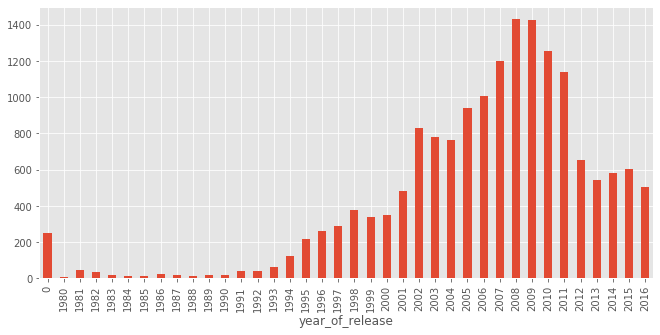

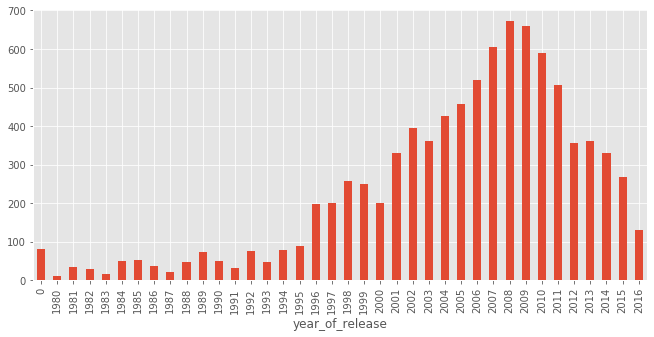

In [11]:
df.groupby(by = 'year_of_release').count().total.plot(kind = 'bar',figsize = (11,5))
plt.show()
df.groupby(by = 'year_of_release').sum().total.plot(kind = 'bar',figsize = (11,5))

In [12]:
df = df[df.year_of_release > 1995]

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. Найдите популярные в прошлом платформы, у которых сейчас продажи на нуле. За какой характерный период появляются новые и исчезают старые платформы?

Топ 5 платформ с найбольшими сумарными продажами:

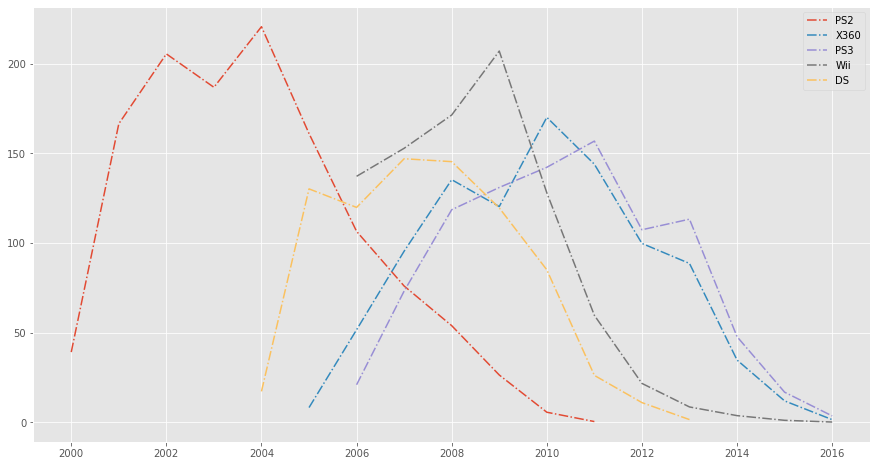

In [13]:
#Задаю размер графиков
plt.rcParams["figure.figsize"] = (15,8)
# пустой массив для данных по платформам
live_time = []
## переменная чтобы визуализировать топ 5 платформ
n = 0
#сортирую и перебираю названия платформ
for i in df.groupby(by = 'platform').sum().total.sort_values(ascending = False).index:
    # вывожу топ 5
    if n < 5:
        plt.plot(df.groupby(by = ['platform','year_of_release']).total.sum()[i],'-.',label = i)
        n += 1
    # формирую список
    live_time.append([i,
    min(df.groupby(by = ['platform','year_of_release']).total.sum()[i].index),
    max(df.groupby(by = ['platform','year_of_release']).total.sum()[i].index),
    max(df.groupby(by = ['platform','year_of_release']).total.sum()[i].index)-
    min(df.groupby(by = ['platform','year_of_release']).total.sum()[i].index)])
#врубаю легенду   
plt.legend();

Что-ж давайте глянем устаревшие платформы по порядку

In [14]:
# сортирую по последней дате прибыли
live_time.sort(key = lambda live_time: live_time[2])

print('платформа |Начало\t|конец\t|продолжительность')
print('-'*55)
for element in live_time:
    print('{0}\t  |{1}г.\t|{2}г.\t|{3}'.format(element[0],element[1],element[2],element[3]))

платформа |Начало	|конец	|продолжительность
-------------------------------------------------------
NG	  |1996г.	|1996г.	|0
PCFX	  |1996г.	|1996г.	|0
SAT	  |1996г.	|1999г.	|3
SNES	  |1996г.	|1999г.	|3
GB	  |1996г.	|2001г.	|5
WS	  |1999г.	|2001г.	|2
N64	  |1996г.	|2002г.	|6
PS	  |1996г.	|2003г.	|7
GBA	  |2000г.	|2007г.	|7
GC	  |2001г.	|2007г.	|6
XB	  |2000г.	|2008г.	|8
DC	  |1998г.	|2008г.	|10
PS2	  |2000г.	|2011г.	|11
DS	  |2004г.	|2013г.	|9
PSP	  |2004г.	|2015г.	|11
X360	  |2005г.	|2016г.	|11
PS3	  |2006г.	|2016г.	|10
Wii	  |2006г.	|2016г.	|10
PS4	  |2013г.	|2016г.	|3
3DS	  |2011г.	|2016г.	|5
PC	  |1996г.	|2016г.	|20
XOne	  |2013г.	|2016г.	|3
WiiU	  |2012г.	|2016г.	|4
PSV	  |2011г.	|2016г.	|5


In [15]:
mean = [] 
not_actual_platform = []
for element in live_time:
    if element[2] < 2016:
        mean.append(element[3])
        not_actual_platform.append(element[0])
print('Средняя продолжительность жизни платформы:')
print("Средняя:",round(np.mean(mean),1),
     "\nМедина:",np.median(np.sort(mean)))

Средняя продолжительность жизни платформы:
Средняя: 5.9 
Медина: 6.0


In [16]:
df = df[~df.platform.isin(not_actual_platform)] 

Как можно заметить PSP,DS,PS2 уже получили свою последнюю прибыль  
а PC в гейм-мире жив уже 19 лет и уходить не собирается хотя и прибыли приносит не особо много  
Зная среднюю продолжительность консолей следует детальнее изучить Xone,PS4 и WiiU 

По предыдущему графику уже видно что PS3 Wii и X360 уже не приносят прибыли  
поэтому выводим все кроме них 

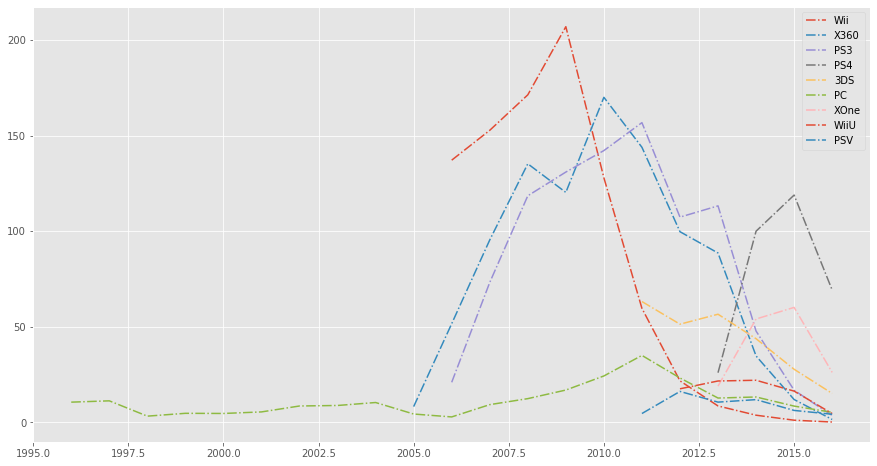

In [17]:
for i in df.platform.unique():
        plt.plot(df.groupby(by = ['platform','year_of_release']).total.sum()[i],'-.',label = i);
plt.legend()

Чтож   
'3DS' -  стремительно катится вниз  
'PSV' и 'WiiU' - устарели  
'PS4' и 'XOne' - самые актуальные на данный момент платформы  
'PC' -  можно назвать анамальной платформой, приносит маленькую прибыль но и не устаревает  

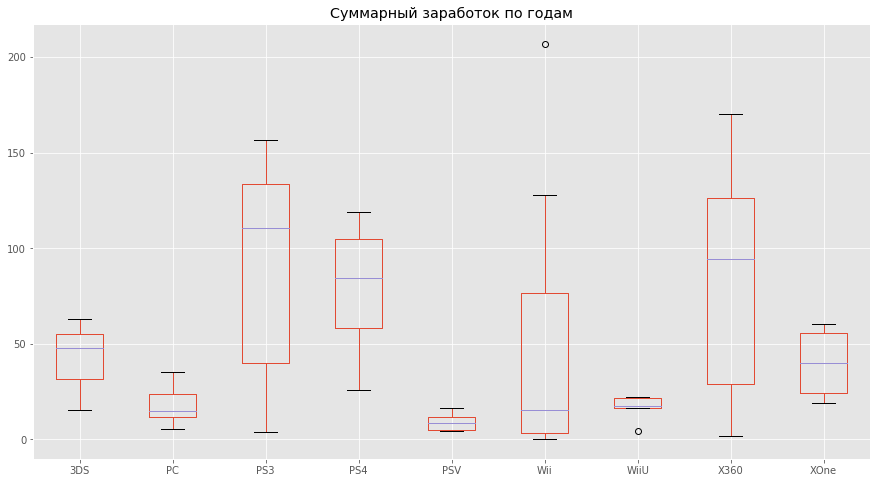

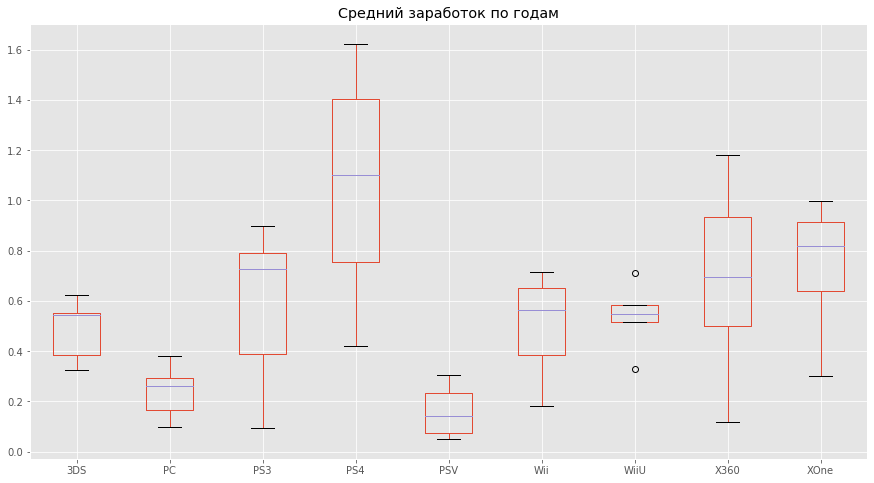

In [18]:
#сводная таблица
box = df[df.year_of_release > 2008].pivot_table(values='total',
                                          columns=df.platform,
                                          index=df.year_of_release,
                                          aggfunc=['sum','mean']
                                         )
box['sum'].boxplot()
plt.title('Суммарный заработок по годам')
plt.show()
box['mean'].boxplot()
plt.title('Средний заработок по годам')
plt.show()

PS3 - отличная платформа медиана среднего и сумарного зароботока смещена верх что говорит о высокой прибыльности жаль устарела  
PS4 - по сумарному заработку еще отстает но в среднем каждая игра приносит более милиона   
XOne - неплохие значения но и не особо выдающиеся среднячок  
Wiiu - странная платформа с выбросами в обе стороны и медианой смещеной в убыток и без квартилей   
Wii - вогшла в топ 5 самых прибыльных платформ но медиана смещена в убыток но с одним выбросом обошедшим всех остальных   вероятнее всего платформу спасает пара игр (авторских) и только для них ее и покупают не стоит рисковать 

X360 и XOne не возымели боьшую популярность в Японии а потому их заработок на парядок ниже серии PS Так же на цену влияет   
и как цена платформы очевидно пользователи более дорого девайся отличаются платежеспособностью  
стоить заметить что 3DS и Wii стоймостью 250$ приносили доход соразмерный PS3

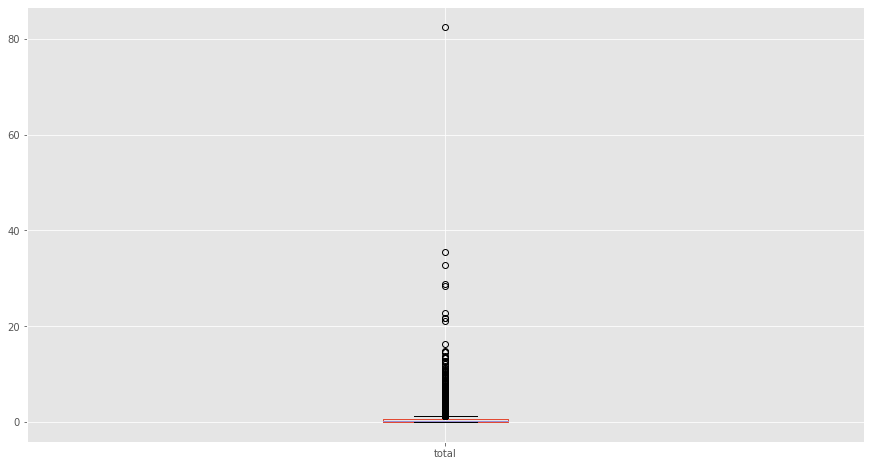

In [19]:
df.boxplot('total')

В целом куча выбросов  шанс сделать непопулярную игру весьма высок  если все не предусмотреть

In [20]:
df[df.platform == 'PS3'][['total','critic_score','user_score']].corr()

,total,critic_score,user_score
total,1.000000,0.432759,0.128416
critic_score,0.432759,1.000000,0.631154
user_score,0.128416,0.631154,1.000000


In [21]:
df[df.platform == 'Wii'][['total','critic_score','user_score']].corr()

,total,critic_score,user_score
total,1.000000,0.177907,0.112831
critic_score,0.177907,1.000000,0.688285
user_score,0.112831,0.688285,1.000000


In [22]:
df[['total','critic_score','user_score']].corr()

,total,critic_score,user_score
total,1.000000,0.221750,0.073556
critic_score,0.221750,1.000000,0.599696
user_score,0.073556,0.599696,1.000000


In [23]:
df[df.platform != 'Wii'][['total','critic_score','user_score']].corr()

,total,critic_score,user_score
total,1.000000,0.331557,0.066695
critic_score,0.331557,1.000000,0.596717
user_score,0.066695,0.596717,1.000000


Мнение критиков заметно влияет на прибыль игры а вот рейтинг игроков на удивление почти ничего не решает    
на определенных платформах выше но в среднем кореляция на уровне 32%,  
Однако есть и 'аномалии' Wii будто совсем плевать на рейтинги

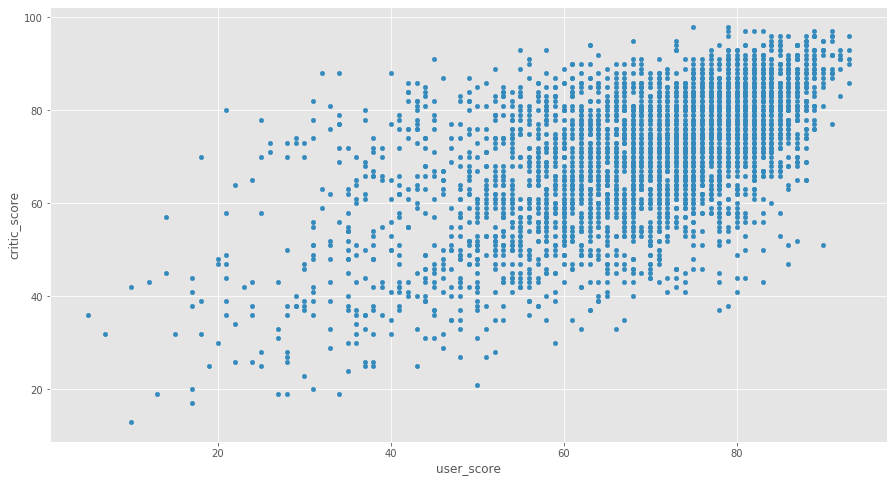

In [24]:
df.plot.scatter(x = 'user_score', y = 'critic_score')

Все любят ставить пятерки когда игра этого заслуживает, однако когда оценка опускается ниже 50 то между  критиками и пользователями начинаются споры  

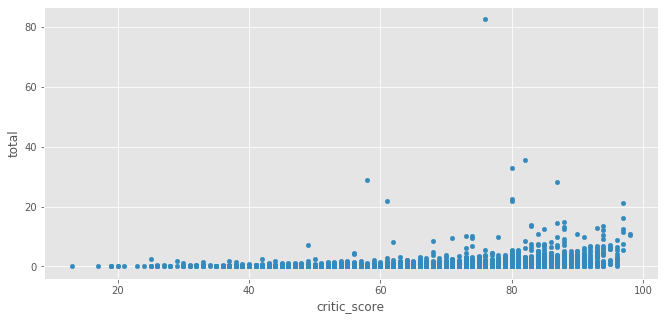

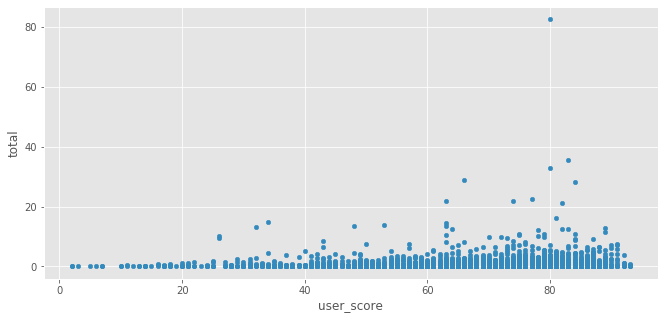

In [25]:
df.plot.scatter(y = 'total', x = 'critic_score',figsize = (11,5));
plt.show()
df.plot.scatter(y = 'total', x = 'user_score',figsize = (11,5));

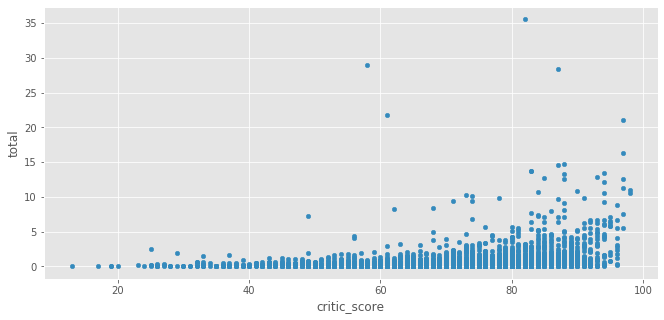

In [26]:
df[df.genre!='Sports'].plot.scatter(y = 'total', x = 'critic_score',figsize = (11,5));

Если критик поставил 100 то шанс получить хорошую прибыль возрастает все как сказал Пирсон

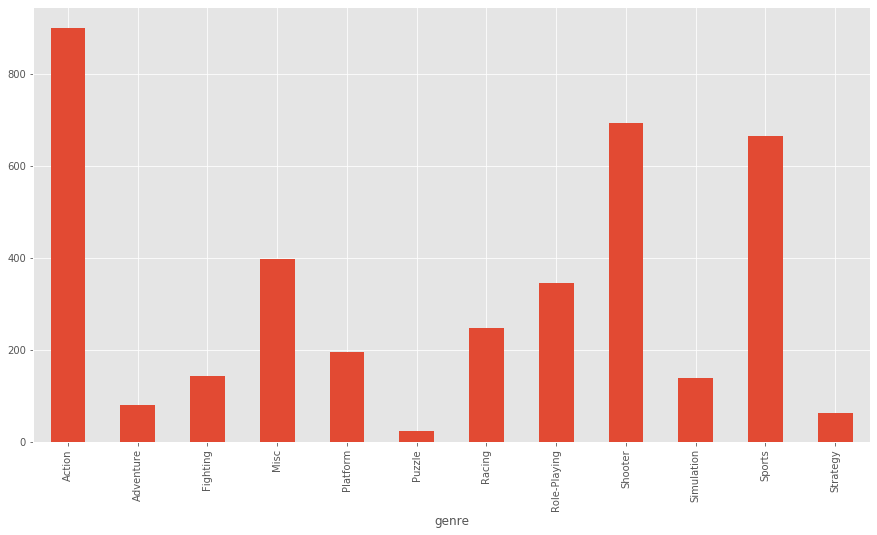

In [27]:
df.groupby('genre').sum().total.plot(kind = 'bar');

Самые прибыльные жанры это Action Sports и Shooter, надеюсь в продакшн пускают не Puzzle

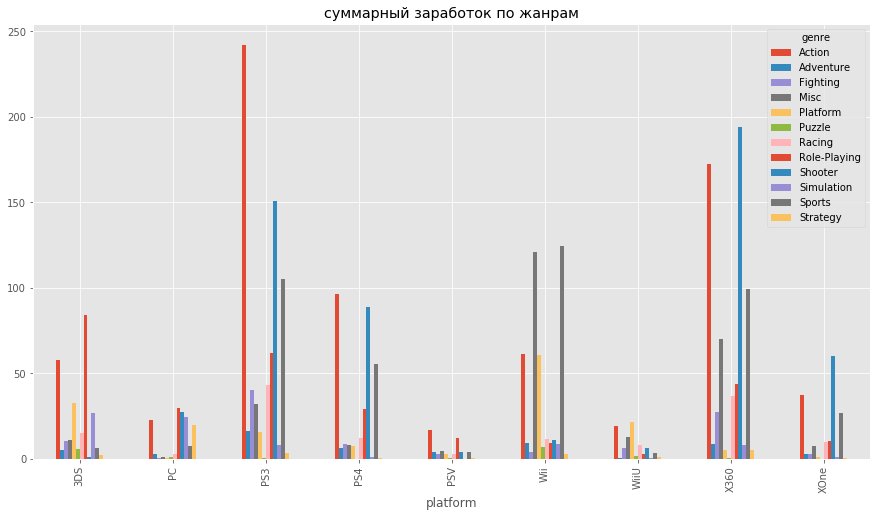

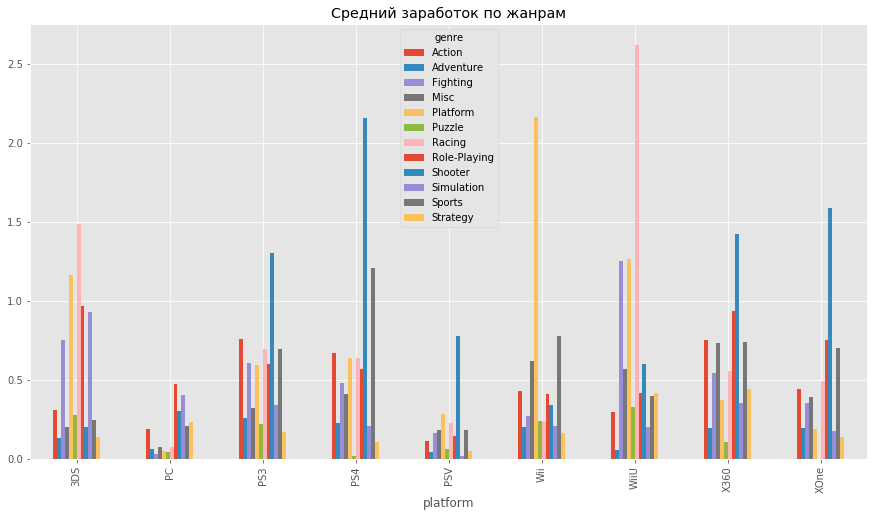

In [28]:
# выбираем год выхода после 2008 и заинтересовавшие нас платформы 
# строим график для доходов каждого жанра 
df[(df.year_of_release > 2008)].pivot_table(values='total',
                                                                                columns=df.genre,
                                                                                index=df.platform,
                                                                                aggfunc=['sum'])['sum'].plot(kind = 'bar',
                                                                                                            )
plt.title('суммарный заработок по жанрам')
plt.show()
df[(df.year_of_release > 2008)].pivot_table(values='total',
                                                                                columns=df.genre,
                                                                                index=df.platform,
                                                                                aggfunc=['mean'])['mean'].plot(kind = 'bar',
                                                                                                               )
plt.title('Средний заработок по жанрам')                                                                                                           
plt.show();

приставки получают доход от  Action, Shooter,Sports и Role-Playing
а производители от Shooter-ов

## Вывод  
Лучше всего запускать игру на PS4 или XOne  
В Shooter,Sports или Role-Playing  
или в WiiU в жанре Racing  
А так же получить благословение критиков

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Анализ популярности жанров проведен. Однако не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 

</div>

<a name="step_5"></a>

## Шаг 5. Составьте портрет пользователя каждого региона

[Наверх к оглавлению](#contents)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
---------------------------------------------Северная Америка---------------------------------------------
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


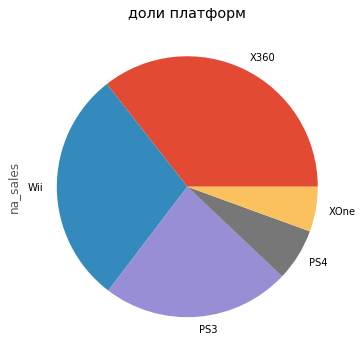

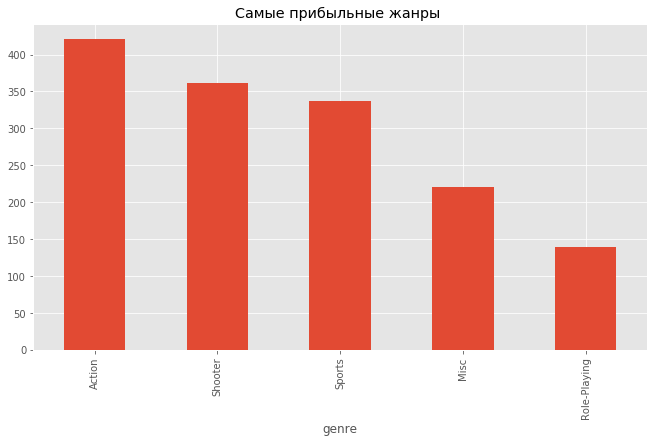

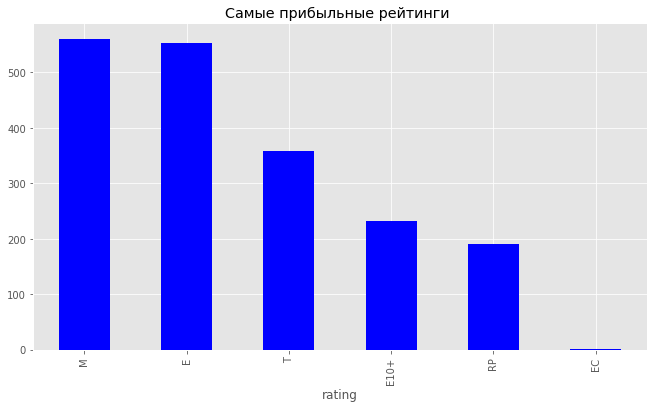

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
---------------------------------------------Европа---------------------------------------------
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


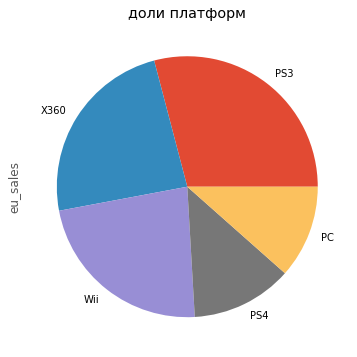

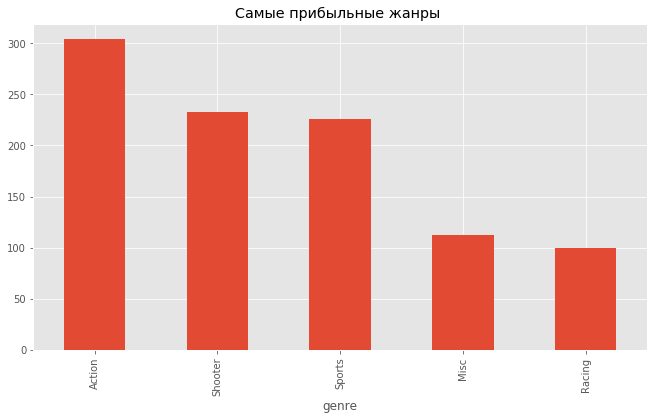

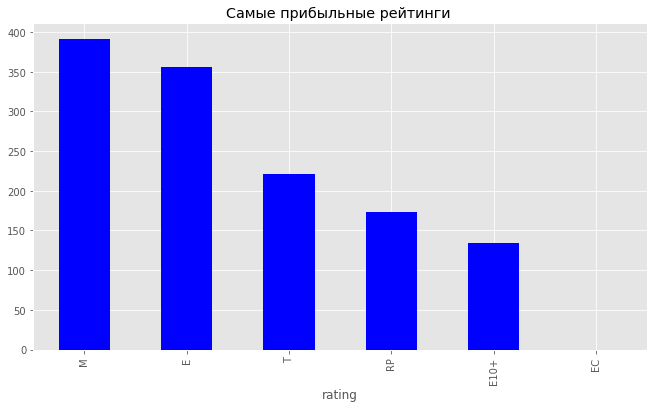

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
---------------------------------------------Япония---------------------------------------------
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


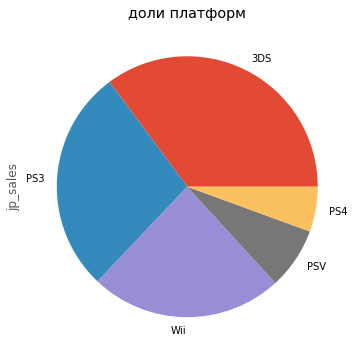

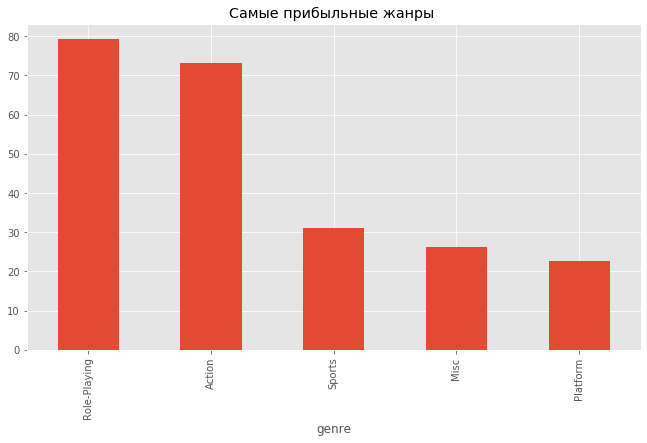

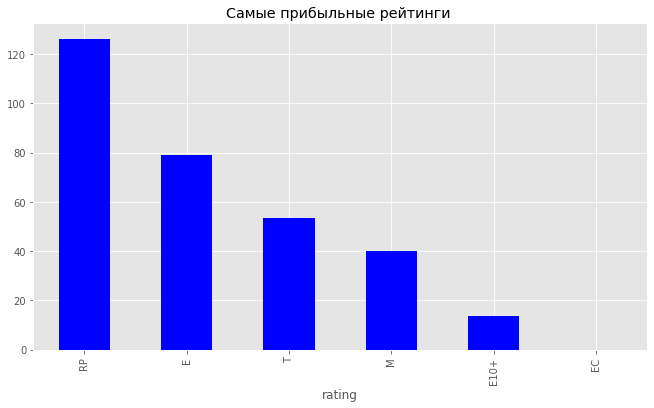

In [29]:
plt.rcParams["figure.figsize"] = (11,6)
region= {'na_sales':"Северная Америка",'eu_sales':"Европа",'jp_sales':"Япония"}
#Перебираю каждый регион
for i in ['na_sales','eu_sales','jp_sales']: 
    #разделям графики для красоты
    print("$"*100+'\n'+"-"*45+region[i]+"-"*45+'\n'+"$"*100)
    #доли платформ в виде пирога
    df.groupby('platform').sum().sort_values(by = i,ascending = False)[i][:5].plot.pie(title = i);
    plt.title('доли платформ')
    plt.show()
    #Доходность по жанрам
    df.groupby('genre').sum().sort_values(by = i,ascending = False)[i][:5].plot.bar()
    plt.title('Самые прибыльные жанры ')
    plt.show()
    #Доходность по рейтингу
    df.groupby('rating').sum().sort_values(by = i,ascending = False)[i].plot.bar(color = 'blue')
    plt.title('Самые прибыльные рейтинги ')
    plt.show()

## Вывод
В Европе и Северной Америке нет приставки монопослиста и прибыль разделена равномерно  
рейтинги E - T - M занимают основу рынка  
Япония любит больше свою приставку Нинтендо(DS) а игры для взрослых меньше  

<a name="step_6"></a>

## Шаг 6. Проведите исследование статистических показателей

[Наверх к оглавлению](#contents)

In [30]:
#строю сводную таблицу по средней стандартному отклонению и дисперсии для рейтинга
df.pivot_table(index ='genre', values = ['critic_score','user_score'], aggfunc = ['mean','std','var','median'])

mean                     std                     var  \
             critic_score user_score critic_score user_score critic_score   
genre                                                                       
Action          68.179512  68.810392    13.900208  13.272157   193.215791   
Adventure       67.666667  71.398693    14.567901  14.833878   212.223744   
Fighting        70.505556  70.445652    13.996607  12.963896   195.904997   
Misc            67.775591  66.345238    14.440037  15.433054   208.514659   
Platform        70.115646  68.753247    15.066754  16.635780   227.007082   
Puzzle          68.177778  69.461538    12.384537  18.501559   153.376768   
Racing          70.019157  65.405109    14.266813  16.085626   203.541939   
Role-Playing    73.643917  73.742210    12.580842  11.479421   158.277589   
Shooter         71.874517  67.453039    15.046469  15.369889   226.396216   
Simulation      68.790960  68.611702    12.476174  15.984059   155.654918   
Sports          70.048193  62.114662    15.161959  16.899504   229.884997   
Strategy        74.333333  71.188482    12.012738  16.611539   144.305882   

                               median             
              user_score critic_score user_score  
genre                                             
Action        176.150147           70         72  
Adventure     220.043946           69         75  
Fighting      168.062604           74         74  
Misc          238.179141           70         69  
Platform      276.749172           71         72  
Puzzle        342.307692           70         74  
Racing        258.747373           72         69  
Role-Playing  131.777105           74         76  
Shooter       236.233492           75         71  
Simulation    255.490130           70         73  
Sports        285.593231           74         66  
Strategy      275.943235           76         77

3580


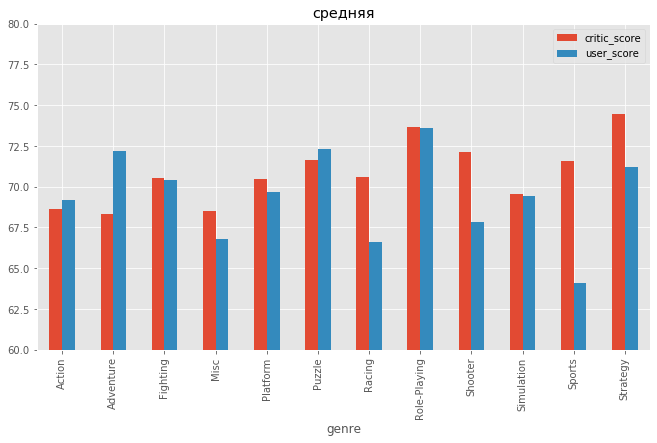

(60, 80)

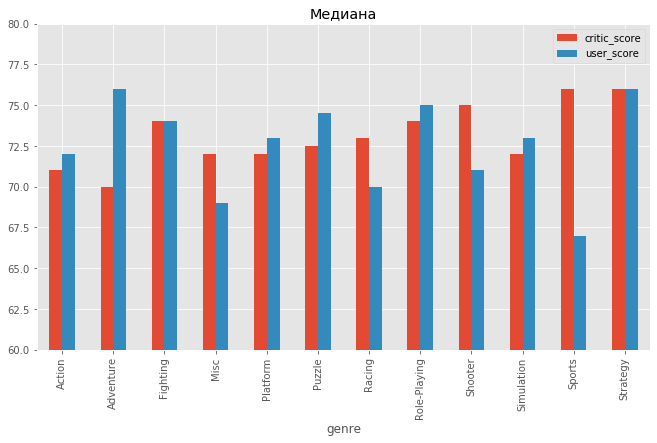

In [31]:
# берем только те игры в которых есть оба вида рейтинга
df_whith_rating = df[~(df.critic_score.isnull())&~(df.user_score.isnull())]
print(df_whith_rating.shape[0])

df_whith_rating.pivot_table(index ='genre',
                            values = ['critic_score','user_score'],
                            aggfunc = ['mean','median']
                           )['mean'].plot(kind = 'bar', title = "средняя")
plt.ylim(60, 80)
plt.show()
df_whith_rating.pivot_table(index ='genre',
                            values = ['critic_score',
                                      'user_score'],
                            aggfunc = ['mean','median'])['median'].plot(kind = 'bar', title = "Медиана")
plt.ylim(60, 80)

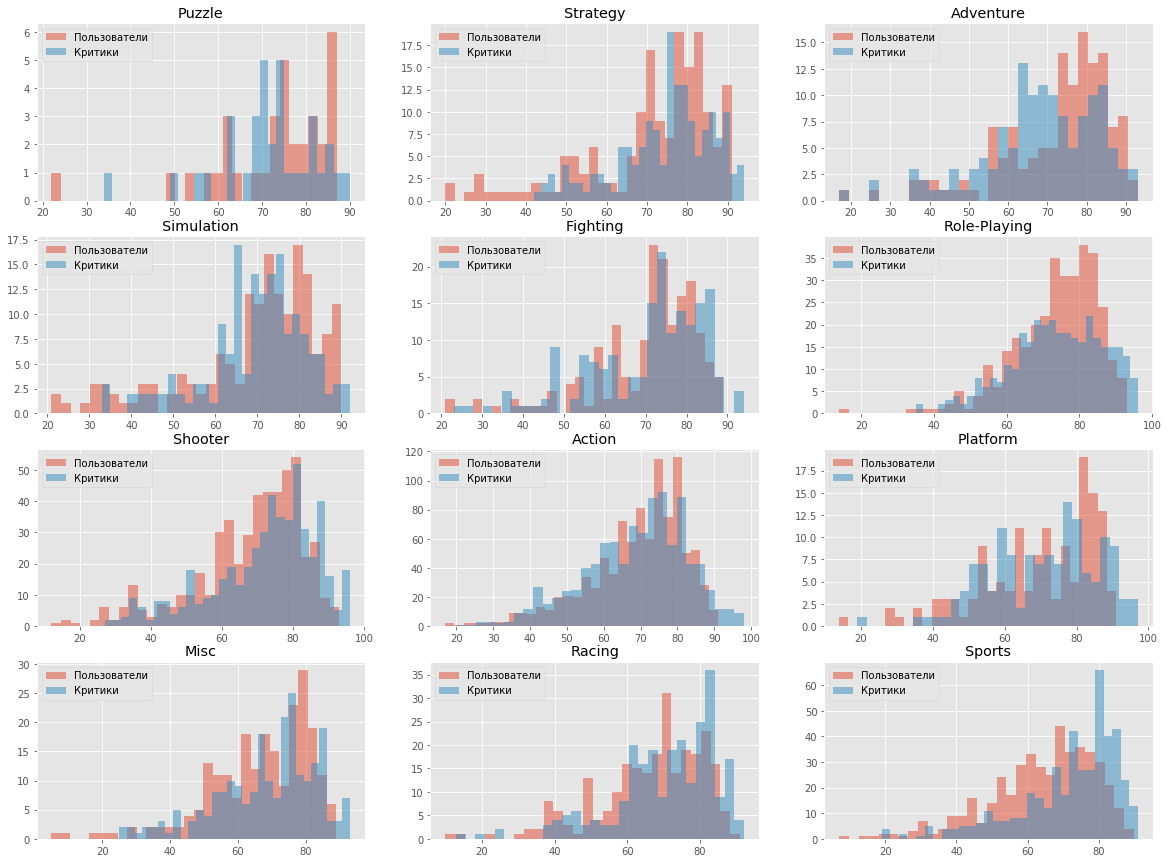

In [32]:
# перебор всех жанров
num = df.genre.unique().shape[0] - 1
fig,a =  plt.subplots(4,3)
for i in range(4):
    for j in range(3):        
        a[i][j].hist(df_whith_rating[df.genre == df.genre.unique()[num]].user_score,alpha= 0.5,bins = 30, label = 'Пользователи')
        a[i][j].hist(df_whith_rating[df.genre == df.genre.unique()[num]].critic_score,alpha = 0.5,bins = 30, label = 'Критики')
        a[i][j].legend()
        a[i][j].set_title(df.genre.unique()[num])
        num -=1
fig.set_size_inches(20, 15)     
plt.show()
    

## Вывод
Чтобы избежать ярых фанатов готовых ставить 100 балов любой игре из своей любой серии и купленных критиков было решено ориентироваться на медиану а для большей честности были выбраны лишь игры имеющие рейтинги как от пользователей так и от критиков  

По графику видно что критики ставят высокие баллы более сдержанно в отличе от пользователей однако предпочитают завышать оценку в играх жанре спорт и занижать приключниям

Большее всего солидарны в гонках а  стратегии и приключечия недооценивать


<a name="step_7"></a>

## Шаг 7. Проверьте гипотезы

[Наверх к оглавлению](#contents)

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.  

Поскольку сравниваемые выборки независимы между собой, будем использовать t-критерий Стьюдента  

Гипотезы:  
H0: средний пользовательский рейтинг платформ Xbox One и PC одинаковые;  
H1: средний пользовательский рейтинг платформ Xbox One и PC разные;  

In [33]:
#критерий значимости 5%
alpha = 0.05

#использую критерий Леввена заодно удаляя пропуски
levene = st.levene(df_whith_rating[df_whith_rating.platform == "XOne"].user_score.dropna(),
                        df_whith_rating[df_whith_rating.platform == "PC"].user_score.dropna())

levene_eq = levene.pvalue >= alpha
if levene_eq:
    print("По тесту Левена дисперсии выборок похожи")
else:
    print("По тесту Левена дисперсии выборок не похожи")

print("pvalue Левена:",levene.pvalue)

#использую критерий Стьюдетна 
result = st.ttest_ind(df_whith_rating[df_whith_rating.platform == "XOne"].user_score.dropna(),
                        df_whith_rating[df_whith_rating.platform == "PC"].user_score.dropna(),equal_var=levene_eq)


print('p-значение: {:.6f}'.format(result.pvalue))

if (result.pvalue <= alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

По тесту Левена дисперсии выборок похожи
pvalue Левена: 0.21794849742459374
p-значение: 0.000070
Отвергаем нулевую гипотезу


Гипотезы:  
H0: средний пользовательский рейтинг жанров Action и Sports одинаковые;  
H1: средний пользовательский рейтинг жанров Action и Sports разные; 

In [34]:
levene = st.levene(df_whith_rating[df_whith_rating.genre == "Action"].user_score.dropna(),
df_whith_rating[df_whith_rating.genre ==  "Sports"].user_score.dropna())

levene_eq = levene.pvalue >= alpha
if levene_eq:
    print("По тесту Левена дисперсии выборок похожи")
else:
    print("По тесту Левена дисперсии выборок не похожи")

print("pvalue Левена:",levene.pvalue)

result = st.ttest_ind(df_whith_rating[df_whith_rating.genre == "Action"].user_score.dropna(),
df_whith_rating[df_whith_rating.genre ==  "Sports"].user_score.dropna(),equal_var = levene_eq)
print('p-значение: {:.6f}'.format(result.pvalue,4))

if (result.pvalue <= alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

По тесту Левена дисперсии выборок не похожи
pvalue Левена: 0.0029753341225287775
p-значение: 0.000000
Отвергаем нулевую гипотезу


Интересно проверить пользователей PS4 и XOne на схожесть
Гипотезы:  
H0: средний пользовательский рейтинг платформ Xbox One и PS4 одинаковые;  
H1: средний пользовательский рейтинг платформ Xbox One и PS4 разные;  

In [35]:
#использую критерий стьюдента заодно удаляя пропуски
result = st.ttest_ind(df[df.platform == "XOne"].user_score.dropna(),
                        df[df.platform == "PS4"].user_score.dropna())
#критерий значимости 5%
alpha = 0.05

print('p-значение: {:.6f}'.format(result.pvalue))

if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.101693
Не получилось отвергнуть нулевую гипотезу


## Вывод
В среднем пользователи PC более лоялны к играм чем пользователи XOne
Пользователи PS4 И XOne довольно схожи как по вкусам так и по критериям оценивания 

<a name="step_8"></a>

## Шаг 8. Общий вывод

[Наверх к оглавлению](#contents)  

Игровая индустрия пошла на спад с 2008 года, возможно мировой кризис 2008 года повлиял на людей и они пошли работать,
а может доступность персональных компьютеров увеличило количество пиратов но пик уже пройдет (если только не создать вирус и заставить людей сидеть дома и покупать игры от скуки) 
- платформы
  - Консоли вида X360,PS2,PS3 зарекомендавали себя высокими доходами.Стоит присмотреться к их старшим братьям PS4 и XOne  
    при этом <b>PS4</b> Наголову опережает XOne в темпе роста  
  - WiiU,PSV, 3DS умерли не родившись, приставки потеряли свой смысл с появлением телефонов и вкладываться вних все равно что
    торговать кнопочными телефонами  
  - ПК гейминг никогда не выбивался вверх, доходы от него стабильны и подойдут лишь играм расчитывающим на долгосрочное развитие
- Регионы
    - Северная Америка и Европа слабо отличаются оба предпочитают игры в жанре Action,Shooter,Sport,Misc,Racing правда Европа 
      предпочитает ролевые игры вместо гонок в америке, В рейтингах M,E,T.ТОП 3 платформы одинаковые PS3,X360,Wii
    - Япония не любит игры из-за бугра и предпочтитает свои игры которым даже не ставят рейтинг.Так же в Японии не в почете X360 
      они пользуются своей приствкой 3DS
- Критики
    - Мнение критиков и успешность игры связаны. Критики более жадны к высоким оценкам однако спортивные игры они любят
    
Самая универсальная консоль PS4 она имеет широкое распростронение во всех регионах и высокую ежегодную прибыль.  
Год ее релиза был в 2013 году, зная среднюю продолжительность жизни приставок в 6 лет она будет находится на пике  
в предстоящем году и вероятнее всего обгонит всех конкурентов.   
С небольшим опережением прибыльность в рейтинге приносят игры для взрослых -  неопределенный рейтинг в японии вероятно связан именно с этим рейтингом.  
Вкус же в жанрах в среднем одинаковый только в Японии предпочитают Role-playing стандартному экшену.  
Мнение критиков и прибыль в среднем корелирует на 33% так что их влияние на игровую индустрию не мало, при закупке игр можно   ориентироваться на их мнение только, если это не на плотформа Wii ей плевать на критиков.   
Самым прибыльным жанром для приставок является Shooter,Sport и Action игры
